In [76]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
import io
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [77]:
df = pd.read_csv('f:/ai_ass/Maternal_Health_Risk_Data_Set.csv')

In [78]:
df.head(5)

,Age,SystolicBP,DiastolicBP,Blood Sugar,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [79]:
#print null values
print(df.isnull().sum())
#desribe the dataset
print(df.describe())

Age             0
SystolicBP      0
DiastolicBP     0
 Blood Sugar    0
BodyTemp        0
HeartRate       0
RiskLevel       0
dtype: int64
               Age   SystolicBP  DiastolicBP   Blood Sugar     BodyTemp  \
count  1014.000000  1014.000000  1014.000000   1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552      8.725986    98.665089   
std      13.474386    18.403913    13.885796      3.293532     1.371384   
min      10.000000    70.000000    49.000000      6.000000    98.000000   
25%      19.000000   100.000000    65.000000      6.900000    98.000000   
50%      26.000000   120.000000    80.000000      7.500000    98.000000   
75%      39.000000   120.000000    90.000000      8.000000    98.000000   
max      70.000000   160.000000   100.000000     19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.00000

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1014 non-null   int64  
 1   SystolicBP    1014 non-null   int64  
 2   DiastolicBP   1014 non-null   int64  
 3    Blood Sugar  1014 non-null   float64
 4   BodyTemp      1014 non-null   float64
 5   HeartRate     1014 non-null   int64  
 6   RiskLevel     1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [81]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', ' Blood Sugar', 'BodyTemp',
       'HeartRate', 'RiskLevel'],
      dtype='object')

In [82]:
df.shape

(1014, 7)

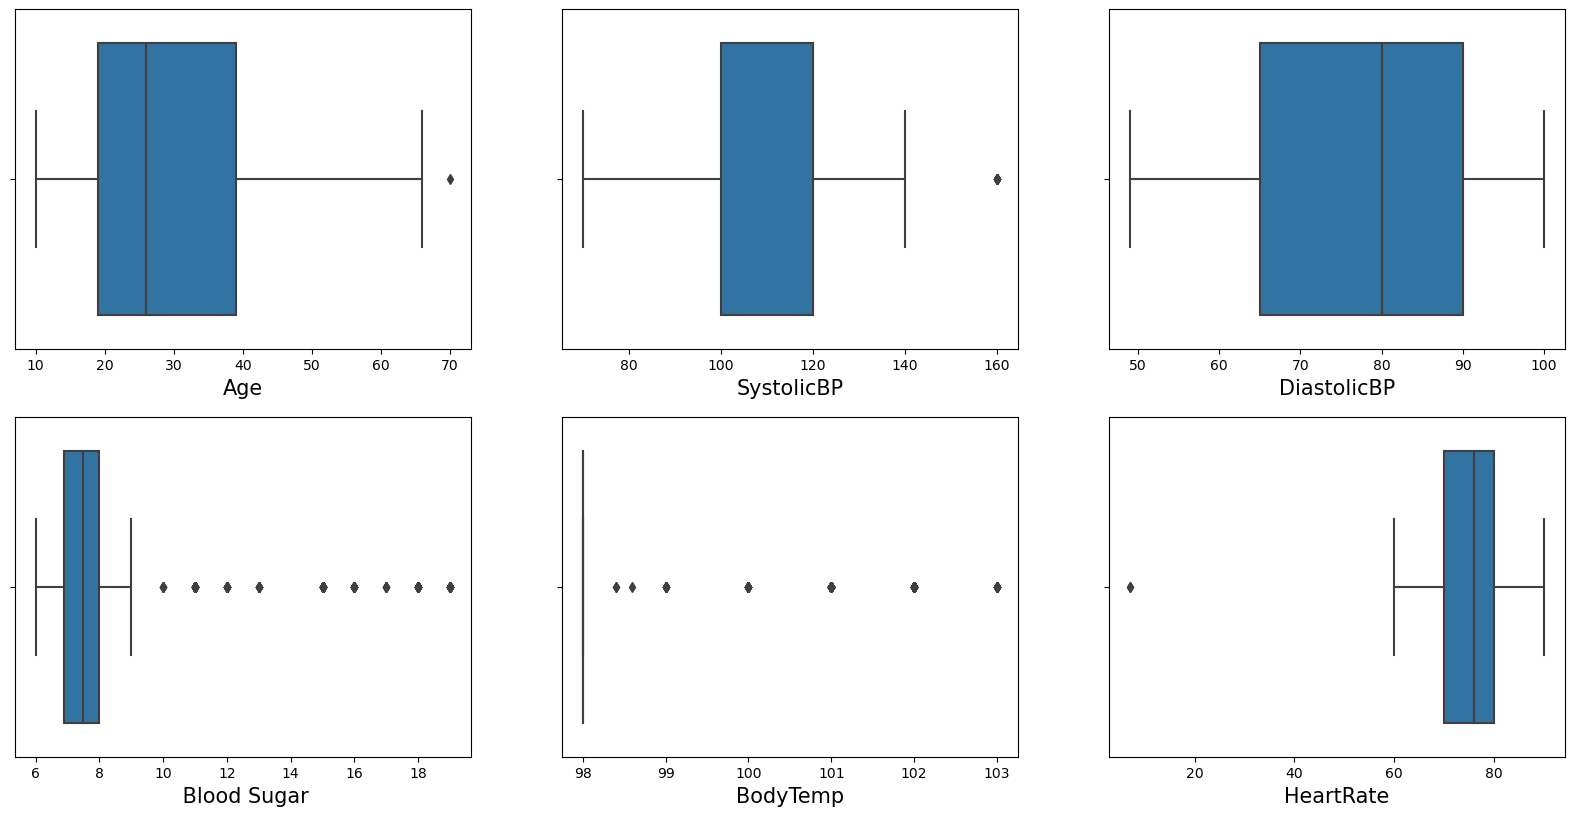

In [83]:
plot.figure(figsize=(20,15))
for i,col in enumerate(df.iloc[:,0:6]):
    plot.subplot(3,3,i+1)
    sns.boxplot(data=df.iloc[:,0:6],x=col)
    plot.xlabel(col, fontsize=15)
    plot.xticks(fontsize=10)

In [84]:
def cap_data(df):
    for col in df.columns:
        print("\n\n capping the \n",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            
            q1=df[col].quantile(0.25)
            q3=df[col].quantile(0.75)
            iqr=q3-q1
            lower,upper=(q1-(iqr*1.5)),(q3+(iqr*1.5))    
            print("q1=",q1,"q3=",q3,"iqr=",iqr,"lower=",lower,"upper=",upper) 
            df[col][df[col] <= lower] = lower
            df[col][df[col] >= upper] = upper
            print("\n",df[col][df[col] <= lower] )
            print("\n",df[col][df[col] >= upper] )
            
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)



 capping the 
 Age
q1= 19.0 q3= 39.0 iqr= 20.0 lower= -11.0 upper= 69.0

 Series([], Name: Age, dtype: int64)

 338    69
Name: Age, dtype: int64


 capping the 
 SystolicBP
q1= 100.0 q3= 120.0 iqr= 20.0 lower= 70.0 upper= 150.0

 19     70
505    70
535    70
661    70
848    70
910    70
928    70
Name: SystolicBP, dtype: int64

 123    150
130    150
166    150
262    150
362    150
538    150
583    150
689    150
961    150
994    150
Name: SystolicBP, dtype: int64


 capping the 
 DiastolicBP
q1= 65.0 q3= 90.0 iqr= 25.0 lower= 27.5 upper= 127.5

 Series([], Name: DiastolicBP, dtype: int64)

 Series([], Name: DiastolicBP, dtype: int64)


 capping the 
  Blood Sugar
q1= 6.9 q3= 8.0 iqr= 1.0999999999999996 lower= 5.250000000000001 upper= 9.649999999999999

 Series([], Name:  Blood Sugar, dtype: float64)

 0       9.65
1       9.65
7       9.65
9       9.65
14      9.65
        ... 
1008    9.65
1009    9.65
1010    9.65
1011    9.65
1012    9.65
Name:  Blood Sugar, Length: 210, dt

C:\Users\keerthana s s\AppData\Local\Temp\ipykernel_1532\3539323121.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= lower] = lower
C:\Users\keerthana s s\AppData\Local\Temp\ipykernel_1532\3539323121.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= upper] = upper
C:\Users\keerthana s s\AppData\Local\Temp\ipykernel_1532\3539323121.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][

<Axes: xlabel='SystolicBP', ylabel='DiastolicBP'>

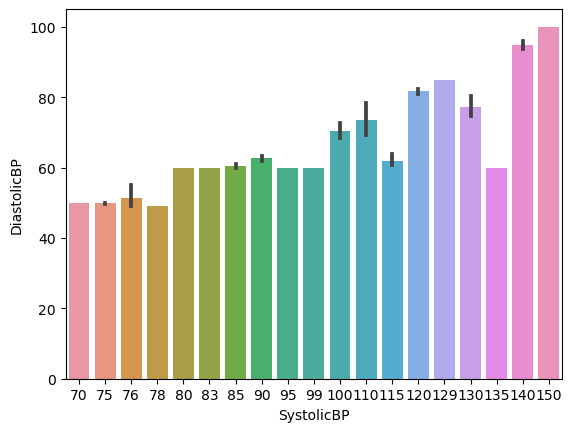

In [85]:
sns.barplot(x='SystolicBP', y='DiastolicBP', data=df)

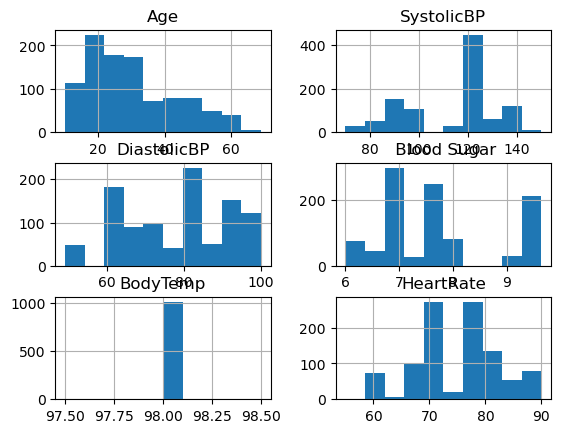

In [86]:
df.hist()
plot.show()

In [87]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Define the columns to encode
columns_to_encode = ['RiskLevel']

# Loop through each column and encode the categories
for col in columns_to_encode:
    encoded_col = le.fit_transform(df[col])
    df[col] = encoded_col

In [88]:
df

,Age,SystolicBP,DiastolicBP,Blood Sugar,BodyTemp,HeartRate,RiskLevel
0,25,130,80,9.65,98.0,86,0
1,35,140,90,9.65,98.0,70,0
2,29,90,70,8.00,98.0,80,0
3,30,140,85,7.00,98.0,70,0
4,35,120,60,6.10,98.0,76,1
...,...,...,...,...,...,...,...
1009,22,120,60,9.65,98.0,80,0
1010,55,120,90,9.65,98.0,60,0
1011,35,85,60,9.65,98.0,86,0
1012,43,120,90,9.65,98.0,70,0


In [89]:
x=df.drop(['RiskLevel'], axis=1)
y=df['RiskLevel']



In [101]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Define a list of models to loop through
models = [
    
    ("Decision Tree Classifier", DecisionTreeClassifier()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("Naive Bayes Classifier", GaussianNB()),
    ("Support Vector Machine Classifier", SVC()),
    
]

# Create a dictionary to store the evaluation metrics for each model
metrics = {}

# Loop through each model and fit it to the training data
for name, model in models:
    model.fit(X_train, y_train)
    
    # Generate predictions on the test data
    y_pred = model.predict(X_test)
    
    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate evaluation metrics
    accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
    precision = cm[1,1] / (cm[1,1] + cm[0,1])
    recall = cm[1,1] / (cm[1,1] + cm[1,0])
    f1_score = 2 * precision * recall / (precision + recall)
    
    # Store the evaluation metrics for this model in the dictionary
    metrics[name] = f1_score
    
    # Print the evaluation metrics
    print(name)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print(classification_report(y_test, y_pred))

# Find the name of the model with the best F1 score
best_model = max(metrics, key=metrics.get)
print("Best model:", best_model)

Decision Tree Classifier
Accuracy: 0.49261083743842365
Precision: 0.9836065573770492
Recall: 0.9230769230769231
F1 Score: 0.9523809523809524
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        47
           1       0.86      0.75      0.80        80
           2       0.75      0.84      0.80        76

    accuracy                           0.81       203
   macro avg       0.81      0.81      0.81       203
weighted avg       0.81      0.81      0.81       203

Random Forest Classifier
Accuracy: 0.4975369458128079
Precision: 0.967741935483871
Recall: 0.9523809523809523
F1 Score: 0.96
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        47
           1       0.85      0.75      0.79        80
           2       0.75      0.84      0.80        76

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82    

In [1]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
# hyperparameters
parameters = {
              'n_estimators': [50, 100,],
              'random_state': [32,42]     
}

ModuleNotFoundError: No module named 'sklearn'

In [92]:
# grid search
classifier = GridSearchCV(model, parameters, cv=5)
# fitting the data to our model
model=classifier.fit(X_train, y_train)

In [93]:
classifier.cv_results_

{'mean_fit_time': array([0.2644949 , 0.2516335 , 0.43739934, 0.4201088 ]),
 'std_fit_time': array([0.04172954, 0.02986413, 0.0558876 , 0.02547362]),
 'mean_score_time': array([0.01906276, 0.01961007, 0.02811751, 0.02991796]),
 'std_score_time': array([0.00690211, 0.00605264, 0.00624805, 0.00820319]),
 'param_n_estimators': masked_array(data=[50, 50, 100, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[32, 42, 32, 42],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 50, 'random_state': 32},
  {'n_estimators': 50, 'random_state': 42},
  {'n_estimators': 100, 'random_state': 32},
  {'n_estimators': 100, 'random_state': 42}],
 'split0_test_score': array([0.78527607, 0.78527607, 0.7791411 , 0.79141104]),
 'split1_test_score': array([0.79012346, 0.80246914, 0.77777778, 0.78395062]),
 'split2_test_score': array([

In [94]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)

{'n_estimators': 50, 'random_state': 32}


In [95]:
# higest accuracy
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.8335984246004695


In [96]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)

In [97]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.264495,0.041730,0.019063,0.006902,50,32,"{'n_estimators': 50, 'random_state': 32}",0.785276,0.790123,0.851852,0.895062,0.845679,0.833598,0.041187,1
1,0.251634,0.029864,0.019610,0.006053,50,42,"{'n_estimators': 50, 'random_state': 42}",0.785276,0.802469,0.845679,0.870370,0.827160,0.826191,0.030230,2
2,0.437399,0.055888,0.028118,0.006248,100,32,"{'n_estimators': 100, 'random_state': 32}",0.779141,0.777778,0.851852,0.876543,0.827160,0.822495,0.039202,4
3,0.420109,0.025474,0.029918,0.008203,100,42,"{'n_estimators': 100, 'random_state': 42}",0.791411,0.783951,0.845679,0.882716,0.820988,0.824949,0.036299,3


In [98]:
input_data = (25,130,80,9.65,98.0,86)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

[0]


F:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [99]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 18,  5],
       [ 1, 73,  6],
       [ 3, 56, 17]], dtype=int64)

In [100]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
precision = cm[1,1] / (cm[1,1] + cm[0,1])
recall = cm[1,1] / (cm[1,1] + cm[1,0])
f1_score = 2 * precision * recall / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1_score)

Accuracy: 0.47783251231527096
Precision: 0.8021978021978022
Recall: 0.9864864864864865
F1 Score: 0.8848484848484848
